High-range raw materials according to their prices:
     Coarse wool Price  Copra Price  Cotton Price  Fine wool Price  \
293             996.74        785.0          1.62              NaN   
311             986.75        990.0          1.44              NaN   
251                NaN          NaN          5.06              NaN   
240             817.36        628.0          1.94           992.28   
37              337.01        274.0          1.33           468.13   
256                NaN        985.0          2.52              NaN   
293             996.74        785.0          1.62              NaN   
37              337.01        274.0          1.33           468.13   
250                NaN          NaN          4.70              NaN   
38              327.79        289.0          1.30           470.06   
198             524.66        410.5          1.26           690.74   
66              495.99        464.0          2.01           622.07   

     Hard log Price  Hard sawnwood Pr

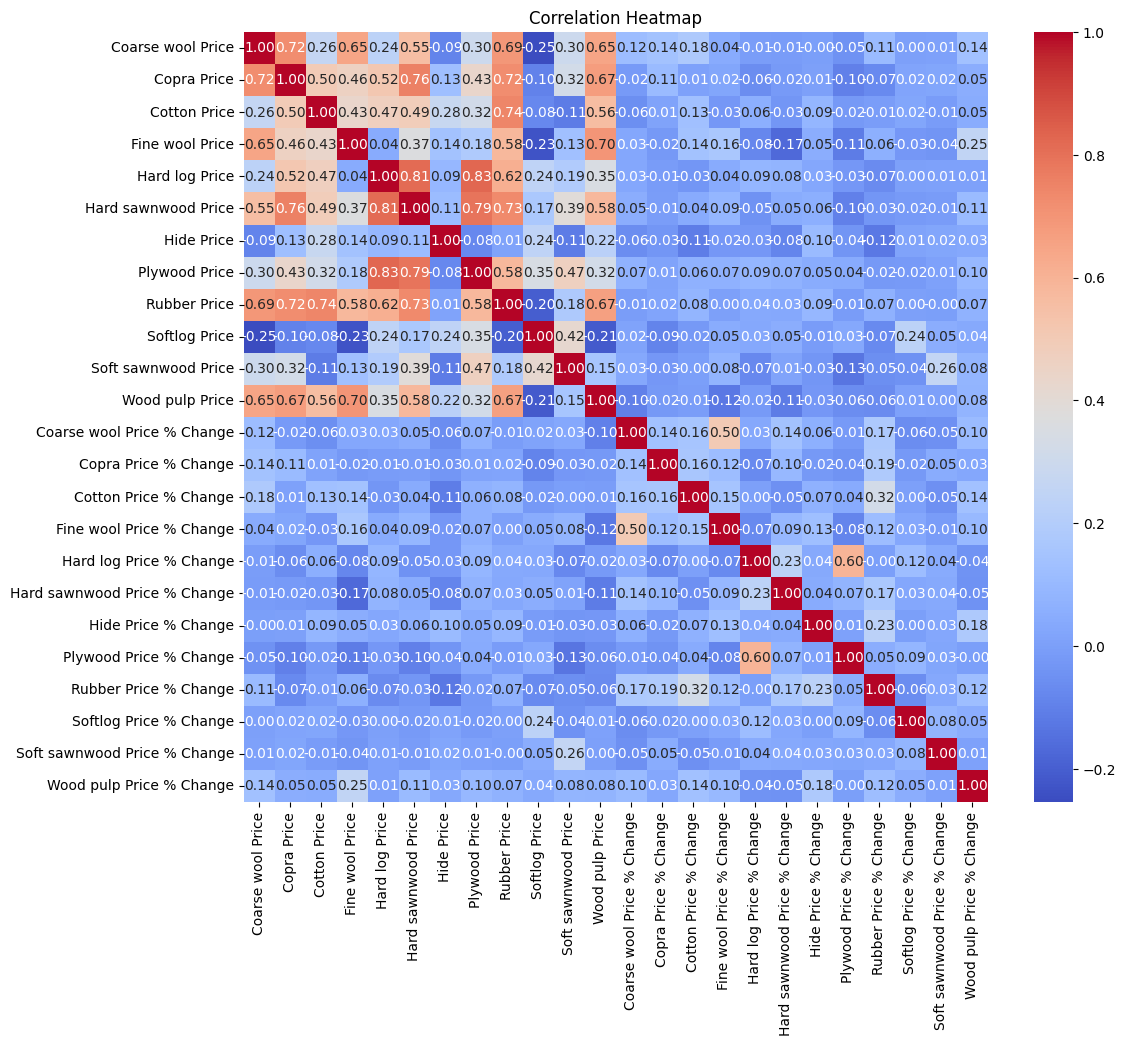

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/agricultural_raw_material.csv')

df.dropna(inplace=True)
price_columns = [col for col in df.columns if 'Price' in col]
df[price_columns] = df[price_columns].apply(pd.to_numeric, errors='coerce')

materials_columns = [col for col in df.columns if 'Price' in col and '% Change' not in col]
for col in materials_columns:
    df[f'{col} % Change'] = df[col].pct_change() * 100

percent_change_columns = df.filter(like='% Change')
percent_change_columns = percent_change_columns.apply(pd.to_numeric, errors='coerce')
percent_change_columns = percent_change_columns.applymap(lambda x: abs(x) if pd.notnull(x) else np.nan)

high_change_materials = df[percent_change_columns.apply(lambda x: x > x.mean()).any(axis=1)]
low_change_materials = df[percent_change_columns.apply(lambda x: x < x.mean()).any(axis=1)]

price_range = df.describe().loc[['min', 'max']]

high_price_materials = df.loc[df[price_columns].idxmax()]
low_price_materials = df.loc[df[price_columns].idxmin()]

print("High-range raw materials according to their prices:")
print(high_price_materials[price_columns])
print("\nLow-range raw materials according to their prices:")
print(low_price_materials[price_columns])

print("\nHigh %Change materials:")
print(high_change_materials[percent_change_columns.columns])
print("\nLow %Change materials:")
print(low_change_materials[percent_change_columns.columns])

print("\nRange of prices changed over the years:")
print(price_range)

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

corr = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# New Section